# Resume Parsing

So basically, we want to create a entity ruler to parse real resume and get the "skills".

But for your assignment, i will ask you to extract education.

## 1. Load data

In [1]:
import pandas as pd
import numpy as np

df_resume = pd.read_csv('/Users/sapnathapa/Documents/AIT/Spring Sem 2023/NLP/Resume Parsing/resume.csv')

In [2]:
df_resume = df_resume.reindex(np.random.permutation(df_resume.index))
df_resume = df_resume.copy().iloc[:1000, ]  #optional if your computer is fast, no need
df_resume.shape

(1000, 4)

## 2. Load skill data

Spacy allows you to give a list of words, then it will automatically create pattern.

In [3]:
import spacy

nlp = spacy.load('en_core_web_md')
skill_path = "/Users/sapnathapa/Documents/AIT/Spring Sem 2023/NLP/Resume Parsing/skills.jsonl"

In [4]:
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [5]:
doc = nlp("Chaky loves deep learning.")
doc.ents

(deep learning,)

## 3. Extracting skills from resume.csv

In [6]:
df_resume.head()

,ID,Resume_str,Resume_html,Category
1872,30304575,ACCOUNTANT II Professional Summ...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT
294,22776912,DIRECTOR OF INFORMATION TECHNOLOGY /C...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
410,28642819,LEAD TEACHER Summary Solid ...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER
1929,71576860,CONCRETE CONSTRUCTION Summary...,"<div class=""fontsize fontface vmargins hmargin...",CONSTRUCTION
1179,43378989,CONSULTANT Summary In-depth ...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT


In [7]:
from spacy.lang.en.stop_words import STOP_WORDS

#before that, let's clean our resume.csv dataframe
def preprocessing(sentence):
    
    stopwords = list(STOP_WORDS)
    doc = nlp(sentence)
    cleaned_tokens = []
    
    for token in doc:
        if token.text not in stopwords and token.pos_ != 'PUNCT' and token.pos_ != 'SPACE' and \
            token.pos_ != 'SYM':
                cleaned_tokens.append(token.lemma_.lower().strip())
                
    return " ".join(cleaned_tokens)

In [8]:
#random sampling
random_resume = df_resume.Resume_str.iloc[5]
random_resume[:300]

'         HR EMPLOYEE RELATIONS SPECIALIST       Summary    Dedicated and self-motivated professional with experience in providing outstanding support\nto business partners. Skillful in tracking details, office management, and following-up with internal\nand external partners to ensure ontime completio'

In [9]:
preprocessing(random_resume[:300])

'hr employee relations specialist summary dedicated self motivated professional experience provide outstanding support business partner skillful track detail office management follow internal external partner ensure ontime completio'

In [10]:
#let's apply to the whole dataframe
for i, row in df_resume.iterrows():
    clean_text = preprocessing(row.Resume_str)
    df_resume.at[i, 'Clean_resume'] = clean_text

In [11]:
df_resume.head()

,ID,Resume_str,Resume_html,Category,Clean_resume
1872,30304575,ACCOUNTANT II Professional Summ...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT,accountant ii professional summary multi - fac...
294,22776912,DIRECTOR OF INFORMATION TECHNOLOGY /C...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,director of information technology technology ...
410,28642819,LEAD TEACHER Summary Solid ...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER,lead teacher summary solid background special ...
1929,71576860,CONCRETE CONSTRUCTION Summary...,"<div class=""fontsize fontface vmargins hmargin...",CONSTRUCTION,concrete construction summary a highly experie...
1179,43378989,CONSULTANT Summary In-depth ...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT,consultant summary in depth knowledge understa...


## 4. Let's really extract skills!!

In [12]:
def get_skills(text):
    #pass the text to the nlp
    doc = nlp(text)  #note that this nlp already know skills
    
    skills = []
    
    #look at the ents
    for ent in doc.ents:
        #if the ent.label_ is SKILL, then we append to some list
        if ent.label_ == "SKILL":
            skills.append(ent.text)
    
    return skills

def unique_skills(x):
    return list(set(x))

In [13]:
df_resume.head(1)

,ID,Resume_str,Resume_html,Category,Clean_resume
1872,30304575,ACCOUNTANT II Professional Summ...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT,accountant ii professional summary multi - fac...


In [14]:
df_resume['Skills'] = df_resume.Clean_resume.apply(get_skills)
df_resume['Skills'] = df_resume.Skills.apply(unique_skills)

In [15]:
df_resume.Skills.iloc[0]

['documentation',
 'play',
 'schedule',
 'business',
 'accounting',
 'finance',
 'support',
 'business administration',
 'software',
 'terminal']

## 5. Visualization

Which skills is most important in information management?

In [16]:
set(df_resume.Category)

{'ACCOUNTANT',
 'ADVOCATE',
 'AGRICULTURE',
 'APPAREL',
 'ARTS',
 'AUTOMOBILE',
 'AVIATION',
 'BANKING',
 'BPO',
 'BUSINESS-DEVELOPMENT',
 'CHEF',
 'CONSTRUCTION',
 'CONSULTANT',
 'DESIGNER',
 'DIGITAL-MEDIA',
 'ENGINEERING',
 'FINANCE',
 'FITNESS',
 'HEALTHCARE',
 'HR',
 'INFORMATION-TECHNOLOGY',
 'PUBLIC-RELATIONS',
 'SALES',
 'TEACHER'}

In [17]:
category = 'INFORMATION-TECHNOLOGY'
cond = df_resume.Category == category

df_resume_it = df_resume[cond]
df_resume_it.shape

(54, 6)

In [18]:
all_skill = np.concatenate(df_resume_it.Skills.values)

In [19]:
#counting
from collections import Counter, OrderedDict

counting = Counter(all_skill)
counting = OrderedDict(counting.most_common(10))

In [20]:
counting

OrderedDict([('support', 50),
             ('software', 47),
             ('business', 44),
             ('design', 36),
             ('security', 36),
             ('windows', 33),
             ('server', 31),
             ('project management', 26),
             ('database', 25),
             ('deployment', 17)])

<BarContainer object of 10 artists>

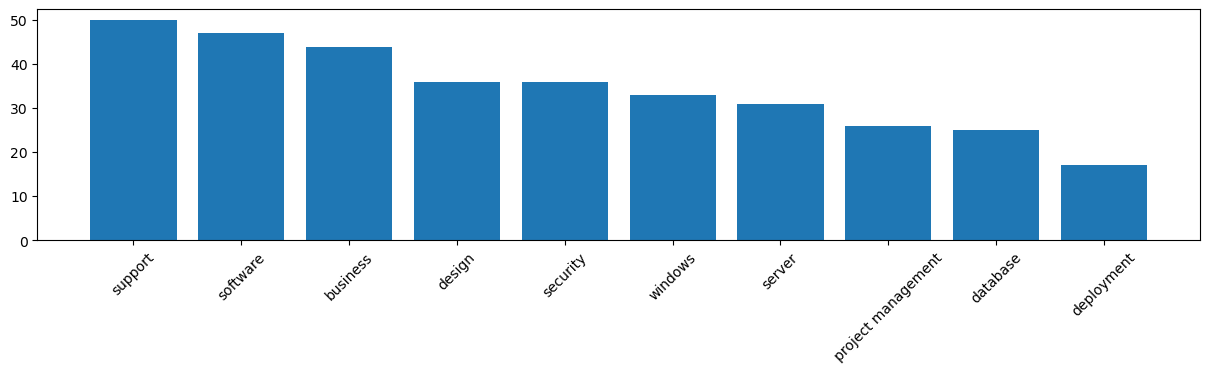

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 3))
plt.xticks(rotation =45)

plt.bar(counting.keys(), counting.values())

## 6. Name Entity Recognition

In [22]:
from spacy import displacy

text = df_resume_it.Clean_resume.iloc[43]

In [23]:
doc = nlp(text)

In [24]:
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [25]:
colors = {"SKILL": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}

displacy.render(doc, style="ent", options=options)

## 7. Let's load the PDF - add some realism

In [26]:
from PyPDF2 import PdfReader
#pip install PyPDF2

reader = PdfReader("/Users/sapnathapa/Documents/AIT/Spring Sem 2023/NLP/Resume Parsing/someone_cv.pdf")
page = reader.pages[0] #first page just for demo
text = page.extract_text() 

In [27]:
text = preprocessing(text)

In [28]:
doc = nlp(text)

In [29]:
colors = {"SKILL": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}

displacy.render(doc, style="ent", options=options)

In [30]:
#last thing i go to assignment
#collect all the skill and put it into a list

skills = []

for ent in doc.ents:
    if ent.label_ == 'SKILL':
        skills.append(ent.text)
        
print(set(skills))

{'deep learning', 'engineering', 'ai', 'algorithms', 'computer science', 'artificial intelligence'}


## Extracting education

In [31]:
from PyPDF2 import PdfReader
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_md')
edu_path = "/Users/sapnathapa/Documents/AIT/Spring Sem 2023/NLP/Resume Parsing/skills_edu.jsonl"

In [32]:
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(edu_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [33]:
# Function to clean the input data.
def preprocessing(sentence):
    stopwords = list(STOP_WORDS)
    doc = nlp(sentence)
    cleaned_tokens = []

    for token in doc:
        if token.text not in stopwords and token.pos_ != 'PUNCT' and token.pos_ != 'SPACE' and \
                token.pos_ != 'SYM':
            cleaned_tokens.append(token.lemma_.lower().strip())

    return " ".join(cleaned_tokens)

In [ ]:
# reader = PdfReader("/Users/sapnathapa/Documents/AIT/Spring Sem 2023/NLP/Resume Parsing/word2vec.pdf")
# page = reader.pages[0] #first page just for demo
# text = page.extract_text() 

In [ ]:
# text = preprocessing(text)

In [ ]:
# doc = nlp(text)

In [34]:
def get_edu(text):
    #pass the text to the nlp
    doc = nlp(text)  #note that this nlp already know skills
    
    education = []
    
    #look at the ents
    for ent in doc.ents:
        #if the ent.label_ is SKILL, then we append to some list
        if ent.label_ == "EDUCATION":
            education.append(ent.text)
    
    return education

In [35]:
df_resume['Education'] = df_resume.Clean_resume.apply(get_edu)
df_resume['Education'] = df_resume.Education.apply(unique_skills)

In [36]:
df_resume.head()

,ID,Resume_str,Resume_html,Category,Clean_resume,Skills,Education
1872,30304575,ACCOUNTANT II Professional Summ...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT,accountant ii professional summary multi - fac...,"[documentation, play, schedule, business, acco...","[master, bachelor]"
294,22776912,DIRECTOR OF INFORMATION TECHNOLOGY /C...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,director of information technology technology ...,"[server, marketing, monitoring, deployment, da...",[bs]
410,28642819,LEAD TEACHER Summary Solid ...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER,lead teacher summary solid background special ...,"[material, collaboration, support, comprehensi...",[bachelor]
1929,71576860,CONCRETE CONSTRUCTION Summary...,"<div class=""fontsize fontface vmargins hmargin...",CONSTRUCTION,concrete construction summary a highly experie...,"[material, business, graphic design, support, ...",[diploma]
1179,43378989,CONSULTANT Summary In-depth ...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT,consultant summary in depth knowledge understa...,"[documentation, server, visual basic, windows,...","[master, bachelor]"


In [37]:
df_resume.Education.iloc[0]

['master', 'bachelor']